In [75]:
import sys

sys.path.append("../python")

In [93]:
import utils
reload(utils)

<module 'utils' from '../python/utils.py'>

In [91]:
emb_dict = utils.load_glove_embedding(utils.glove_embedding_path(25))

In [94]:
df = utils.load_all_tweets("../data/raw")

df.columns

Error reading ../data/raw/tweet_72950.txt.gz: Expecting value: line 1 column 1 (char 0)


Index(['extended_tweet/full_text', 'id', 'lang', 'retweet_count', 'retweeted',
       'retweeted_status/extended_tweet/full_text', 'text', 'truncated',
       'user/name'],
      dtype='object')

In [95]:
df.loc[88477,["text","retweeted_status/extended_tweet/full_text","extended_tweet/full_text"]].tolist()

['RT @InfoProNetwork: IAM Platform Curated Retweet:\n\nVia: https://t.co/Uv7cPR0434\n\n#ICYMI Researchers used #DeepLearning methods to predict s…',
 'IAM Platform Curated Retweet:\n\nVia: https://t.co/Uv7cPR0434\n\n#ICYMI Researchers used #DeepLearning methods to predict several severe complications in ICU patients. #MachineLearning #MedTech \n\nhttps://t.co/TS7tYwCESd\n\n#IAMPlatform\n#TopInfluence\n#HealthCareTechnology',
 None]

In [107]:
# df["has_full_text"] = ~df["extended_tweet/full_text"].isna()
# df["has_rt_full_text"] = ~df["retweeted_status/extended_tweet/full_text"].isna()

# df.loc[ df["has_full_text"], "text"] = df["extended_tweet/full_text"].dropna()
# df.loc[ (df["has_rt_full_text"] & ~df["has_full_text"]), "text"] = df["retweeted_status/extended_tweet/full_text"].dropna()

# df["truncated"] = df["truncated"] & ~(df["has_rt_full_text"] | df["has_full_text"])

# (~df["truncated"]).sum()

In [108]:
non_words  = '🤖👌➡️➡️👉🤖🎓🌐🚀💻\u2066😎\xa0👩\u200d🏫🎬💻🤖🌐🎓🚀\u2069™✨\U0001f9e0\u200b💪😍🤓🎉🚀🚀👋🔹👉👉✍🏽🌟✨🏆🎉👾😃✅'
non_words += '🌐☞☞😷\xa0\xa0\xa0👇😁😁😁👏——🔗📽️⚡️⚡️👍——🙏🏻🙌🏼❤️🚀🤓☞\xa0🍷👉🖥️💡🔸👏👏👏✌😉☞💵☺️🤜🤛💪🇬🇧🇨🇦🚀🎥😬👌🏼🍸🇬🇷💙☞\xa0😳👊👏📸▶️🎊'
non_words += '✨📊📉🌱💙📺😇\xa0—👁📊☞👉🏽🚀🌳👩🏽\u200d🏫🌊👨🏻\u200d🌾📚✏️💕\U0001f970🙋'
non_words += '🏻\u200d♂️🙌🏼👍🏼#\U0001f9fb💪➱➱–📝👊🏻🤷🏽\u200d♂️🍁✍️🤖\U0001f928📊📈✨🌟🏆🎉️⃣️⃣✔🔝《⚡⏱✈️🤔\U0001f928🤔¡⠀👉'
non_words += '\u2063\u2063\u2063\u2063☞–💻🤔☞🇯🇵🇮🇳👏🏽–🎉❤️🎓🏛️🤔✈️👉\u200a—\u200a✒️\xa0😍😬🌐😊😁😍👀☞❤️\U0001f929✨🔑🤖🤖🎓🏡🤝📽😎🚨🚨🤖🚖—》💥💥🔥🏙🔥'
non_words += '🔲´🖼😂😏💚💜💜🌍😲📒📋🥇👑💎\u3000📣🕴🚚💰🦈🙂💧🍅🍎🍐🍊🥑🍉🍇🏎📖💯💯🤣🐵📣🔖\U0001f9fe📑\xad\xad😆🎡📢📷💁😮😲😂😂😂😀🎂🥗🎙⚽„😭😭😭😭💃💫'
non_words += '😧⤵🍳🔟<>🔬<>€<><><>🏾\U0001f92f\x9d<><>\U0001f973‑'
non_words = non_words.replace("#","").replace("&","").replace("<","").replace(">","")

pre_filters = non_words
post_filters='!"“”‘’’’’$%&()*+,-./:;=?@[\\]^_`{|}~…\t\n'

df["preproc_text"] = df["text"].apply(lambda x: utils.cleanup_text(x,pre_filters=pre_filters,post_filters=post_filters) )

In [109]:
df[["text","preproc_text"# ,"user/name"
    ,"truncated"
   ]].sample(20).values.tolist()

[['Join the Speech &amp; Dialogue Research Group to work on cutting edge research and development in:\n-Speech Recognition\n-Dialogue\n-Natural Language Processing\n-Far Field Audio Capture\n-Advanced Machine Learning Frameworks\nApply now: https://t.co/4XKx6Yf4CZ #NeurIPS2018',
  'Join the Speech amp Dialogue Research Group to work on cutting edge research and development in Speech Recognition Dialogue Natural Language Processing Far Field Audio Capture Advanced Machine Learning Frameworks Apply now <url> <hashtag> #neurips2018 <stop>',
  False],
 ['Wrote an article on Generative Adversarial Networks (GANs) and the GAN I created to generate handwritten digits! Check it out: https://t.co/D7JjKMrJP6\n\n#ArtificialIntelligence #MachineLearning #Technology #NeuralNetworks #Innovation #Art #Creative https://t.co/1yU4aN1sxW',
  'Wrote an article on Generative Adversarial Networks GANs and the GAN I created to generate handwritten digits Check it out <url> <hashtag> #artificialintelligence <

In [110]:
from keras.preprocessing.text import Tokenizer

In [111]:
tmptk = Tokenizer(filters="", # already applied
               lower=True,
               split=" ")
tmptk.fit_on_texts(df["preproc_text"].apply(lambda x: x.replace("RT <user>","")))

last = None
def duplicate(x):
    global last
    if x == last:
        return True
    last = x
    return False

df["sequences"] = tmptk.texts_to_sequences(df["preproc_text"])
duplicates = df["sequences"].sort_values().apply(duplicate)
duplicates.sort_index(inplace=True)

print("duplicated tweets: %d/%d %f" % ( duplicates.sum(), duplicates.shape[0], duplicates.sum()/duplicates.shape[0]) )

duplicated tweets: 54358/81282 0.668758


In [112]:
df = df[~duplicates]

del df["sequences"]

In [113]:
df.to_hdf("../data/preproc/tweets.hd5","tweets")

/home/musella/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['extended_tweet/full_text', 'lang', 'retweeted_status/extended_tweet/full_text', 'text', 'user/name', 'preproc_text']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [114]:
tk = Tokenizer(filters="", # already applied
               lower=True,
               split=" ")
tk.fit_on_texts(df["preproc_text"])

In [115]:
list( tk.word_index.items() )[:20]

[('<hashtag>', 1),
 ('<url>', 2),
 ('<user>', 3),
 ('<stop>', 4),
 ('#machinelearning', 5),
 ('the', 6),
 ('#ai', 7),
 ('to', 8),
 ('and', 9),
 ('<number>', 10),
 ('of', 11),
 ('in', 12),
 ('gt', 13),
 ('a', 14),
 ('#datascience', 15),
 ('for', 16),
 ('#bigdata', 17),
 ('#deeplearning', 18),
 ('#artificialintelligence', 19),
 ('rt', 20)]

In [116]:
list( tk.word_index.keys() )[:20]

['<hashtag>',
 '<url>',
 '<user>',
 '<stop>',
 '#machinelearning',
 'the',
 '#ai',
 'to',
 'and',
 '<number>',
 'of',
 'in',
 'gt',
 'a',
 '#datascience',
 'for',
 '#bigdata',
 '#deeplearning',
 '#artificialintelligence',
 'rt']

Text(0,0.5,'fraction of words in corpus')

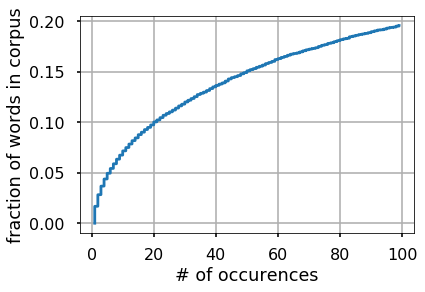

In [117]:
pdf = np.array(list(map(lambda x: x[1], sorted( tk.word_counts.items(), key=lambda x: x[1], reverse=True)))).astype(np.float)
cdf = pdf.cumsum()
# pdf //= cdf[-1]
cdf /= cdf[-1]
 
plt.plot( pdf[pdf<100],1-cdf[pdf<100] )
# plt.plot( cdf[pdf<10] )
plt.grid()
plt.xlabel("# of occurences")
plt.ylabel("fraction of words in corpus")


In [118]:
threshold = 0.90
max_words = int( np.ceil( (cdf>threshold).argmax() / 100) * 100 )

print( "Fraction of corpus: {}.\nFraction of dictionary: {} / {}.\nMax ingored occurence: {} " .format(threshold, max_words, len(tk.word_index), pdf[max_words]) )

Fraction of corpus: 0.9.
Fraction of dictionary: 2500 / 28611.
Max ingored occurence: 20.0 


In [119]:
# max_words = 1700
missing,hashtags = utils.get_uknown_words(tk.word_index,emb_dict,max_words)


In [120]:
list(filter(lambda x: "<" in x[0] or ">" in x[0],missing))


[('<stop>', 4)]

In [121]:
len(missing), len(hashtags), max_words

(50, 433, 2500)

In [122]:
import re
non_words = map(lambda x: re.sub("\w","",x[0]), missing)

non_words = list(non_words)

''.join(non_words).replace("#","")

'<>'

In [123]:
missing[:20]

[('<stop>', 4),
 ('vanloon', 150),
 ('mikequindazzi', 164),
 ('tensorflow', 347),
 ('machinelearning', 483),
 ('kirkdborne', 499),
 ('daysofcode', 526),
 ('ipfconline1', 549),
 ('neurips', 562),
 ('whova', 663),
 ('spirosmargaris', 783),
 ('evankirstel', 807),
 ('poptimize', 808),
 ('deeplearn007', 817),
 ('convolutional', 858),
 ('daysofmlcode', 863),
 ('fisher85m', 899),
 ('v1', 924),
 ('kdnuggets', 930),
 ('chatbots', 940)]

In [124]:
sequences = tk.texts_to_sequences(df["preproc_text"])

In [125]:
id_to_hash = { x[1] : x[0] for x in hashtags }#+missing  }

def hashtags_from_seq(seq):   
    return filter(lambda y: y is not None, map(lambda x: id_to_hash.get(x,None), seq))
        
hastags_seqs = map(lambda x: " ".join(list(hashtags_from_seq(x))), sequences)    

with open("../data/preproc/hash_corpus.txt","w+") as co:
    co.write( "\n".join(list(filter(lambda x: len(x)>0,hastags_seqs))))